In [95]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.10.0


## Creating data to view and fit

array([ True,  True,  True,  True,  True,  True,  True,  True])

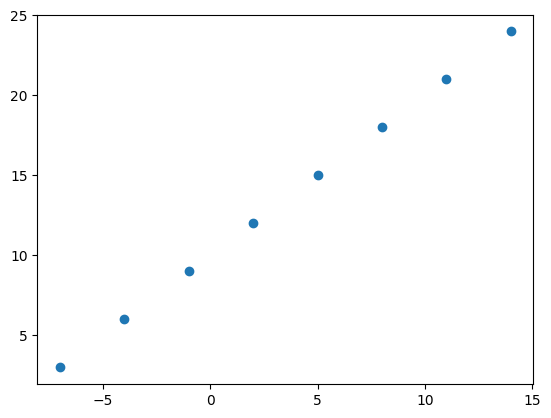

In [96]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)
y == X + 10

## Input and output shapes

In [97]:
X.shape, y.shape

((8,), (8,))

In [98]:

# Turn our NumPy arrays into tensors with dtype float32
# X = tf.cast(tf.constant(X), dtype=tf.float32)
# y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

**Note:** shape of inputs should not be 1

In [99]:
X= tf.expand_dims(X,axis=-1)

X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [100]:
X.dtype, y.dtype

(tf.float64, dtype('float64'))

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers pf a machine(deep) learning model.
2. **Compiling a model** - define the loss function, the optimizer and evaluation metrics. 
3. **Fitting a model** - letting the model try to find patterns between inputs and outputs

### Sequential way to build a model

In [101]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,activation='relu')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics='mae' ) # mae : mean absolute error
# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 214ms/step - loss: 13.0404 - mae: 13.0404
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.0029 - mae: 13.0029
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 12.9654 - mae: 12.9654
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 12.9279 - mae: 12.9279
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 12.8904 - mae: 12.8904


**MAE function :**


In [102]:
y_true = np.array([[1, 2, 3], [4, 5, 6]])
y_pred = np.array([[2, 3, 2], [7, 1, 4]])
loss = np.mean(abs(y_true - y_pred), axis=-1)
loss
#axis=-1: Indicates that the mean should be calculated along the last axis of the input array.

array([1., 3.])

### Functional API way to build a model

In [103]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
               metrics=['mae'])

model2.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 177ms/step - loss: 16.0534 - mae: 16.0534
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 13.7897 - mae: 13.7897
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 12.4647 - mae: 12.4647
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1397 - mae: 11.1397
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 9.8147 - mae: 9.8147


In [104]:
class personalized_Callback(tf.keras.callbacks.Callback):
    def __init__(self, SHOW_NUMBER=10):
        super().__init__()
        self.SHOW_NUMBER = SHOW_NUMBER
        self.counter = 1
        # self.epoch=0

    def on_epoch_begin(self, epoch, logs=None):
       self.epoch=epoch +1
    def on_train_batch_end(self, batch, logs=None):
        
        if (self.counter % self.SHOW_NUMBER) == 0 or self.epoch == 1:
            print(f'epoch : {self.epoch } | loss: {logs["loss"]}')
        self.counter +=1

model2.fit(X, y, epochs=50,  callbacks=[personalized_Callback()], verbose=0)

epoch : 1 | loss: 8.489736557006836
epoch : 10 | loss: 6.618750095367432
epoch : 20 | loss: 6.056249618530273
epoch : 30 | loss: 5.512499809265137
epoch : 40 | loss: 4.9499993324279785
epoch : 50 | loss: 4.40625


### Make a prediction with our model

In [105]:
model2.predict([15,20,23]),model.predict([17,20,23])

1/1 [==============================] - 0s 50ms/step


(array([[26.261848],
        [33.6158  ],
        [38.028168]], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32))

 ### Improving our model
 
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the nb of hidden layer units within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

### <i>More epochs!</i>

In [106]:

# Let's rebuild our model

# 1. Create the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model3.fit(X, y, epochs=100,verbose=0,callbacks=[personalized_Callback(SHOW_NUMBER=20)]) # verbose=0 to skip printing details about training


epoch : 1 | loss: 12.972293853759766
epoch : 20 | loss: 10.454792022705078
epoch : 40 | loss: 7.804793834686279
epoch : 60 | loss: 7.085625171661377
epoch : 80 | loss: 6.973125457763672
epoch : 100 | loss: 6.860625743865967


In [107]:
model3.predict([17]) 


1/1 [==============================] - 0s 48ms/step


array([[29.60314]], dtype=float32)

**Big improvment error of 2.xxx on this prediction and LOSS +=- 6**

### <i>More layers!</i>

In [108]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Dense(units=1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics='mae')

model3.fit(X, y, epochs=10,verbose=0,callbacks=[personalized_Callback()])


epoch : 1 | loss: 10.288531303405762
epoch : 10 | loss: 7.277763366699219


**Tiny improvement LOSS +=- 13.xx**

### <i>More neurons!</i>

In [151]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100,activation='relu'),
    tf.keras.layers.Dense(units=1),
    
])

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics='mae')

model4.fit(X, y, epochs=100,verbose=0,callbacks=[personalized_Callback()])


epoch : 1 | loss: 13.284967422485352
epoch : 10 | loss: 5.89393949508667
epoch : 20 | loss: 3.9051709175109863
epoch : 30 | loss: 3.9198431968688965
epoch : 40 | loss: 3.8486146926879883
epoch : 50 | loss: 3.8453617095947266
epoch : 60 | loss: 3.8049252033233643
epoch : 70 | loss: 3.765312433242798
epoch : 80 | loss: 3.75870943069458
epoch : 90 | loss: 3.674412727355957
epoch : 100 | loss: 3.71937894821167


In [152]:
model4.predict([17])

1/1 [==============================] - 0s 49ms/step


array([[32.074486]], dtype=float32)

**Good improvement LOSS +=- 3.xx but overfitting here**


### <i>Tuning hyperparameters!</i>
optimizer, learning rate,activation function, loss function... 


In [149]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation='relu'),
    
])

model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.1),
               metrics='mae')

model5.fit(X, y, epochs=100,verbose=0,callbacks=[personalized_Callback()])


epoch : 1 | loss: 9.124387741088867
epoch : 10 | loss: 4.510769367218018
epoch : 20 | loss: 4.775317668914795
epoch : 30 | loss: 4.211775779724121
epoch : 40 | loss: 3.9981789588928223
epoch : 50 | loss: 3.6792373657226562
epoch : 60 | loss: 3.3055007457733154
epoch : 70 | loss: 2.962709426879883
epoch : 80 | loss: 2.484470844268799
epoch : 90 | loss: 1.8662766218185425
epoch : 100 | loss: 1.1265071630477905


In [150]:
model5.predict([17]) # BEST RESULT

1/1 [==============================] - 0s 50ms/step


array([[27.271557]], dtype=float32)

**HUGE improvement LOSS +=- 1,xx**


## Summary : 
  * Tuning our **hyperparamaters** and **NN architecture** is maybe the most important part in the training section. 
  * We did not need to resort to **cleaning** our data or getting **more samples** and despite this we improved the performance of our model.
  * More computations doesn't mean better results, and we encountered that in adding **more units** to our first hidden layer in 'model4', that led to overfitting '
  * **Combining** multiple changes and hyperparameters that **works together** gave us the best model 'model5'  